<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [3]:
import numpy as np

In [13]:
X = np.array(([0,0,1],
             [0,1,1],
             [1,0,1],
             [0,1,0],
             [1,0,0],
             [1,1,1],
             [0,0,0]),
            dtype = float)

y = np.array(([0],[1],[1],[1],[1],[0],[0]),
             dtype = float)

In [23]:
##### Your Code Here #####
class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.input = 3
        self.hiddenNodes = 4
        self.outputNodes = 1
        
        # Initial Weights
        # 2x3 Matrix Array for the First Layer
        self.weights1 = np.random.randn(self.input,self.hiddenNodes)
        # 3x1 Matrix Array for Hidden to Output
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        

    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    
    def feed_forward(self,X):
        """
        Calculate the NN inference using feed forward.
        """
        
        # Weighted sum of inputs & hidden
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weighted sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final Activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    
    def backward(self, X, y, o):
        """
        Backward propagate through the network
        """
        self.o_error = y - o #error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # apply derivative of sigmoid to error
        
        self.z2_error = self.o_delta.dot(self.weights2.T) # z2 error: how much our hidden layer weights were off
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.activated_hidden)
        
        self.weights1 += X.T.dot(self.z2_delta) #Adjust first set (input => hidden) weights
        self.weights2 += self.activated_hidden.T.dot(self.o_delta) #adjust second set (hidden => output) weights
        
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [24]:
nn = NeuralNetwork()

print(X[0])
output = nn.feed_forward(X[0])
print("output", output)

[0. 0. 1.]
output [0.6528385]


In [25]:
error = y[0] - output
error

array([-0.6528385])

In [26]:
output_all = nn.feed_forward(X)
error_all = y - output_all
print(output_all)
print(error_all)

[[0.6528385 ]
 [0.60338374]
 [0.64069627]
 [0.59295516]
 [0.62904358]
 [0.59638406]
 [0.64437712]]
[[-0.6528385 ]
 [ 0.39661626]
 [ 0.35930373]
 [ 0.40704484]
 [ 0.37095642]
 [-0.59638406]
 [-0.64437712]]


In [29]:
# Find which layer is producing poor weights
attributes = ['weights1', 'hidden_sum', 'activated_hidden', 'weights2', 'activated_output','output']

[print(i + '\n', getattr(nn,i), '\n'+'---'*3) for i in dir(nn) if i in attributes]

activated_hidden
 [[0.6228877  0.55068571 0.03242881 0.35159744]
 [0.06612507 0.99552333 0.0495059  0.99360595]
 [0.99724101 0.07010318 0.05629717 0.99273501]
 [0.04110634 0.99451887 0.60846196 0.99652264]
 [0.99545107 0.05794621 0.64027886 0.9960474 ]
 [0.93937513 0.93187428 0.08484128 0.99997446]
 [0.5        0.5        0.5        0.5       ]] 
---------
activated_output
 [[0.00668251]
 [0.95688551]
 [0.95951367]
 [0.95017315]
 [0.94837986]
 [0.04770098]
 [0.09080583]] 
---------
hidden_sum
 [[ 0.50182323  0.20344165 -3.39574177 -0.61202484]
 [-2.64779455  5.40439019 -2.95489005  5.04597241]
 [ 5.89012756 -2.58510551 -2.81916707  4.91739625]
 [-3.14961778  5.20094854  0.44085172  5.65799725]
 [ 5.38830433 -2.78854716  0.5765747   5.52942109]
 [ 2.74050978  2.61584303 -2.37831535 10.5753935 ]
 [ 0.          0.          0.          0.        ]] 
---------
weights1
 [[ 5.38912202 -2.78934276  0.57623405  5.52966329]
 [-3.15022117  5.20185129  0.4405247   5.65821873]
 [ 0.50197253  0.203

[None, None, None, None, None]

Low predictions? -> Try increasing weights in either layer. Biggest positive effect from increasing weights in places where there are already high activation values. Decrease activations that correspond to negative weights and increase activations corresponding with positive weights. 


In [28]:
nn = NeuralNetwork()

# Train the nn over 1000 epochs 
for i in range(1000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 50 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', X)
        print('Actual Output: \n', y)
        print('Predicted Output: \n', str(nn.feed_forward(X)))
        print("Loss: \n", str(np.mean(np.square(y - nn.feed_forward(X)))))
    nn.train(X,y) 

+---------EPOCH 1---------+
Input: 
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
Actual Output: 
 [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]
Predicted Output: 
 [[0.48930052]
 [0.21807986]
 [0.18634985]
 [0.09920813]
 [0.08222238]
 [0.09470159]
 [0.24229641]]
Loss: 
 0.4620369109517397
+---------EPOCH 2---------+
Input: 
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
Actual Output: 
 [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]
Predicted Output: 
 [[0.56174119]
 [0.32733081]
 [0.27174338]
 [0.15120005]
 [0.11968984]
 [0.15147074]
 [0.30068107]]
Loss: 
 0.4153077902252257
+---------EPOCH 3---------+
Input: 
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
Actual Output: 
 [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]
Predicted Output: 
 [[0.63985006]
 [0.47631123]
 [0.3923817 ]
 [0.23723216]
 [0.18080498]
 [0.25478594]
 [0.37775379]]
Loss: 
 0.35905244033838646
+---------EPOCH

## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


### Parts
1. Gathering & Transforming the Data
2. Making MNIST a Binary Problem
3. Estimating your Neural Network (the part you focus on)

### Gathering the Data 

`keras` has a handy method to pull the mnist dataset for you. You'll notice that each observation is a 28x28 arrary which represents an image. Although most Neural Network frameworks can handle higher dimensional data, that is more overhead than necessary for us. We need to flatten the image to one long row which will be 784 values (28X28). Basically, you will be appending each row to one another to make on really long row. 

In [32]:
pip install tensorflow

     |████████████████████████████████| 102.7MB 687kB/s eta 0:00:01    |████████                        | 25.4MB 690kB/s eta 0:01:52     |█████████████████               | 54.4MB 654kB/s eta 0:01:14     |█████████████████▋              | 56.7MB 849kB/s eta 0:00:55     |█████████████████████▉          | 70.1MB 885kB/s eta 0:00:37     |██████████████████████████▍     | 84.7MB 845kB/s eta 0:00:22     |█████████████████████████████▎  | 93.9MB 657kB/s eta 0:00:14     |██████████████████████████████▏ | 97.0MB 611kB/s eta 0:00:10     |██████████████████████████████▋ | 98.3MB 620kB/s eta 0:00:08
     |████████████████████████████████| 450kB 615kB/s eta 0:00:01
     |████████████████████████████████| 51kB 880kB/s eta 0:00:01
     |████████████████████████████████| 51kB 1.0MB/s eta 0:00:01
     |████████████████████████████████| 61kB 135kB/s eta 0:00:01
     |████████████████████████████████| 3.8MB 839kB/s eta 0:00:01
     |████████████████████████████████| 2.1MB 732kB/s eta 0:00:01
     |██████

In [42]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [43]:
# input image dimensions
img_rows, img_cols = 28, 28

In [44]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [35]:
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

In [36]:
# Now the data should be in a format you're more familiar with
x_train.shape

(60000, 784)

### Making MNIST a Binary Problem 
MNIST is multiclass classification problem; however we haven't covered all the necessary techniques to handle this yet. You would need to one-hot encode the target, use a different loss metric, and use softmax activations for the last layer. This is all stuff we'll cover later this week, but let us simply the problem for now: Zero or all else.

In [8]:
y_temp = np.zeros(y_train.shape)
y_temp[np.where(y_train == 0.0)[0]] = 1
y_train = y_temp

y_temp = np.zeros(y_test.shape)
y_temp[np.where(y_test == 0.0)[0]] = 1
y_test = y_temp

In [9]:
# A Nice Binary target for ya to work with
y_train

# ..nice

array([0., 1., 0., ..., 0., 0., 0.])

In [10]:
print(x_train.shape)

(60000, 784)


In [24]:
X = pd.DataFrame(x_train)
y = pd.DataFrame(y_train)

df = pd.concat([X, y], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Estimating Your `net

In [28]:
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

dataset = np.array(df)

In [29]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return weights

l_rate = 0.1
n_epoch = 10
weight = train_weights(dataset, l_rate, n_epoch)
print(weights)

>epoch=0, lrate=0.100, error=975.000
>epoch=1, lrate=0.100, error=775.000
>epoch=2, lrate=0.100, error=728.000


KeyboardInterrupt: 

In [38]:
pip install keras

     |████████████████████████████████| 378kB 533kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [61]:
import keras
from keras.datasets import mnist

# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training label shape: ", y_train.shape) # (60000,) -- 60000 numbers (all 0-9)
print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

x_train.shape

Training label shape:  (60000,)
First 5 training labels:  [5 0 4 1 9]


(60000, 784)

In [62]:
# Another method:

from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


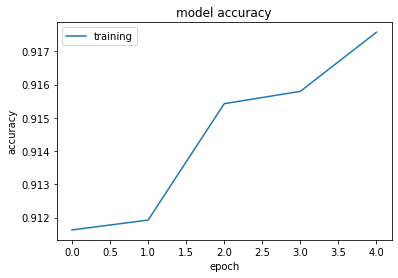

Test loss: 0.306
Test accuracy: 0.918


In [66]:
import matplotlib.pyplot as plt

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [85]:
# Look at effect of hidden-layer depth

def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=100, epochs=20):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_72 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


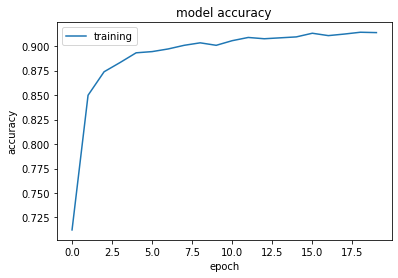


Test loss: 0.285
Test accuracy: 0.918
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_74 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_75 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


KeyboardInterrupt: 

In [83]:
for layers in range(1, 5):
    model = create_dense([32] * layers)
    evaluate(model)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_79 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


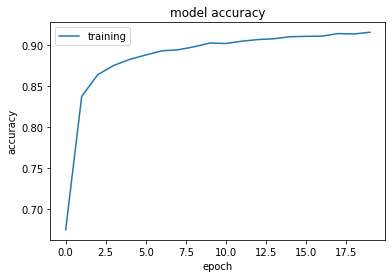


Test loss: 0.298
Test accuracy: 0.916


In [86]:
# Single hidden-layer accuracy levels are best.
#  Look at epochs in greater depth for this model. 
for layers in range(1,2):
    model = create_dense([32] * layers)
    evaluate(model)
    
# Five epochs seems sufficient

That's some impressive accuracy. Can also fiddle with batch-size, the layer depth and the number of nodes per layer. 

## Stretch Goals: 

- Make MNIST a multiclass problem using cross entropy & soft-max
- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?